In [1]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

C:\Users\LENOVO\anaconda3\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


AttributeError: module 'matplotlib_inline' has no attribute 'backend_inline'

In [2]:
from sklearn.datasets import make_circles


n = 500


X, y = make_circles(n_samples=n, noise=0.02)


X = torch.tensor(X, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float).reshape(n, -1)

In [3]:
X[:5], y[:5]

(tensor([[-0.1738, -0.9817],
         [-0.7576,  0.6561],
         [ 0.5795,  0.8424],
         [-0.7953, -0.6563],
         [ 0.6529, -0.7606]]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

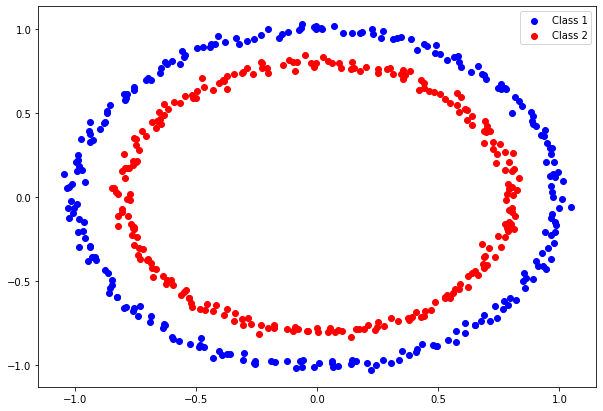

In [4]:
plt.figure(figsize=(10, 7))

plt.scatter(X[:, 0][np.where(y == 0)[0]], X[:, 1][np.where(y == 0)[0]], c="blue", label="Class 1")
plt.scatter(X[:, 0][np.where(y == 1)[0]], X[:, 1][np.where(y == 1)[0]], c="red", label="Class 2")
plt.legend()
plt.show()

In [5]:
class ANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.input = nn.Linear(2, 2)
     
        self.output = nn.Linear(2, 1)
        
    def forward(self, x):
        x = F.relu(self.input(x))
        x = self.output(x)
        return x

In [6]:
from sklearn.metrics import accuracy_score


def train_and_evaluate(X, y, lr, n_epochs):
    model = ANN()

    loss_fun = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)

    for curr_epoch in range(n_epochs):
        pred = model(X)
        loss = loss_fun(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        

    prediction_probas = model(X).detach()
    predictions = (prediction_probas > 0).float()
    acc = accuracy_score(y, predictions)

    return model, predictions.detach(), acc

In [7]:
def plot_decision_boundary_contour(model, X, y, acc):

    
    x_min, x_max = X[:, 0].min().item() - .5, X[:, 0].max().item() + .5
    y_min, y_max = X[:, 1].min().item() - .5, X[:, 1].max().item() + .5
    h = 0.01
    
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    tensor_for_pred = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    Z = model(tensor_for_pred).detach().reshape(xx.shape)
    Z_classes = (Z > 0).float()
    
    plt.figure(figsize=(10, 7))
    plt.title(f"Accuracy = {100 * acc}%")
    plt.contourf(xx, yy, Z_classes, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary)

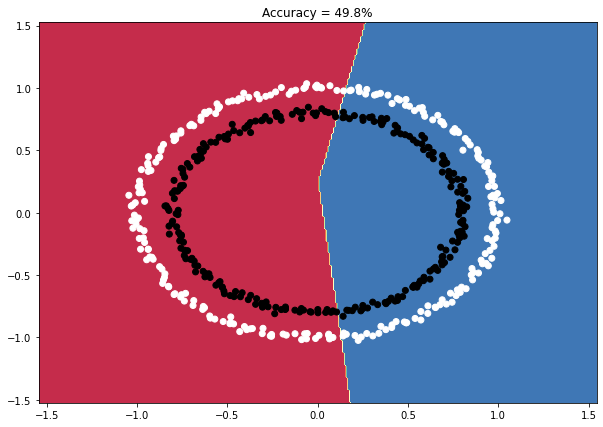

In [8]:
model, predictions, acc = train_and_evaluate(X, y, 0.01, 500)
plot_decision_boundary_contour(model, X, y, acc)